In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import glob

In [8]:
dados_pe_rn = glob.glob('base_dados/consulta*.csv')
print(dados_pe_rn)

['base_dados\\consulta_cand_2016_PE.csv', 'base_dados\\consulta_cand_2016_RN.csv', 'base_dados\\consulta_cand_2020_PE.csv', 'base_dados\\consulta_cand_2020_RN.csv']


In [9]:
lista_df = []

for dados_estado in dados_pe_rn:
    df_estado = pd.read_csv(dados_estado, sep=';', encoding='latin_1', na_values=["#NULO#"], low_memory=False)
    lista_df.append(df_estado)

In [10]:
df_estado.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,05/08/2021,12:18:13,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO,N,S,-1,6000968720206200037,2,DEFERIDO,2,DEFERIDO,SIM
1,05/08/2021,12:18:13,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6002612520206200041,2,DEFERIDO,2,DEFERIDO,SIM
2,05/08/2021,12:18:13,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6001834320206200037,2,DEFERIDO,2,DEFERIDO,SIM
3,05/08/2021,12:18:13,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6005626220206200011,2,DEFERIDO,2,DEFERIDO,SIM
4,05/08/2021,12:18:13,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6002608820206200025,2,DEFERIDO,2,DEFERIDO,SIM


In [11]:
print(lista_df[0:2])

[       DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_TIPO_ELEICAO    NM_TIPO_ELEICAO  \
0      18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
1      18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
2      18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
3      18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
4      18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
...           ...        ...          ...              ...                ...   
19137  18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
19138  18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
19139  18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
19140  18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
19141  18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   

       NR_TURNO  CD_ELEICA

In [12]:
lista_df[0].columns==lista_df[3].columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [13]:
df_completo = pd.concat(lista_df, axis=0)

In [15]:
df_completo.shape

(59991, 63)

In [16]:
df_completo['DS_CARGO'].unique()

array(['VEREADOR', 'VICE-PREFEITO', 'PREFEITO'], dtype=object)

In [18]:
df_completo['DS_DETALHE_SITUACAO_CAND'].unique()

array(['DEFERIDO', 'RENÚNCIA', 'INDEFERIDO', 'DEFERIDO COM RECURSO',
       'INDEFERIDO COM RECURSO', 'NÃO CONHECIMENTO DO PEDIDO',
       'CANCELADO', 'FALECIDO', 'PENDENTE DE JULGAMENTO',
       'CASSADO COM RECURSO', 'CANCELADO COM RECURSO',
       'PEDIDO NÃO CONHECIDO', 'CASSADO'], dtype=object)

In [20]:
df_vereadores = df_completo[
    (df_completo['CD_CARGO'] == 13) &
    ((df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO') | 
     (df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO'))
].copy()

In [22]:
df_vereadores.shape

(52176, 63)

In [24]:
df_vereadores.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

In [25]:
df_raca_genero = df_vereadores[['ANO_ELEICAO', 'CD_CARGO','SG_UF','NR_PARTIDO', 'SG_PARTIDO', 'CD_GENERO','DS_GENERO', 
                                'CD_COR_RACA', 'DS_COR_RACA', 'NR_IDADE_DATA_POSSE', 'VR_DESPESA_MAX_CAMPANHA']].copy()

In [26]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
0,2016,13,PE,27,PSDC,4,FEMININO,3,PARDA,49.0,96474.36
1,2016,13,PE,22,PR,4,FEMININO,1,BRANCA,26.0,10803.91
2,2016,13,PE,15,PMDB,2,MASCULINO,3,PARDA,40.0,16678.93
3,2016,13,PE,27,PSDC,2,MASCULINO,1,BRANCA,39.0,21221.89
4,2016,13,PE,10,PRB,4,FEMININO,3,PARDA,36.0,10803.91


In [27]:
df_raca_genero[['ANO_ELEICAO','DS_GENERO', 'CD_CARGO']].groupby(by=['ANO_ELEICAO','DS_GENERO']).sum()

CD_CARGO
ANO_ELEICAO DS_GENERO               
2016        FEMININO          100880
            MASCULINO         216086
            NÃO DIVULGÁVEL        13
2020        FEMININO          122174
            MASCULINO         239135

<AxesSubplot:xlabel='ANO_ELEICAO,DS_GENERO'>

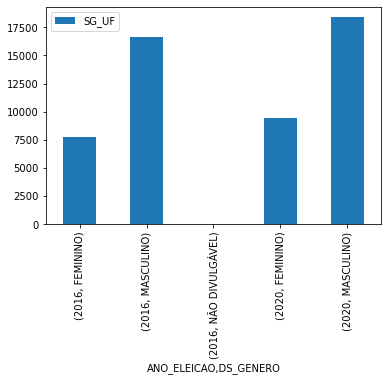

In [30]:
df_raca_genero[['ANO_ELEICAO','SG_UF','DS_GENERO']].groupby(by=['ANO_ELEICAO','DS_GENERO']).count().plot(kind='bar')